In [1]:
import torch
from torch import nn
from utils import predict
from PIL import Image, ImageDraw
import numpy as np
from model import YOLO
from dataset import yolo_dataset
import pandas as pd
from torch.utils.data import DataLoader
from torchvision import transforms
from create_dataset import create_image

In [2]:
checkpoint = torch.load('./models/checkpoint_9_epochs.pth', map_location=torch.device('cpu'))
print (checkpoint.keys())
S = checkpoint['S']
B = checkpoint['B']
C = checkpoint['C']
IMG_SIZE = checkpoint['IMG_SIZE']
architecture_config = checkpoint['architecture_config']

dict_keys(['state_dict', 'datetime', 'S', 'B', 'C', 'IMG_SIZE', 'epochs', 'descricao', 'architecture_config'])


In [3]:
transformer = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(.5, .5, .5), std=(.5, .5, .5))
])

model = YOLO(S, B, C, IMG_SIZE, architecture_config)
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

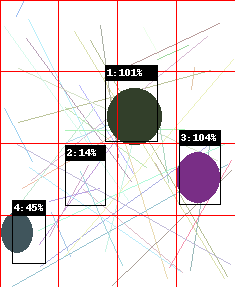

In [23]:
img_pil, annotations = create_image(n_objects=3)
img_pil, predictions = predict(model, img_pil, transformer, prob_threshold=0.1, print_grid=True)
# print (predictions)
img_pil